In [1]:
from transformers import pipeline

try:
    ner_pipe = pipeline("ner", model="dslim/bert-base-NER", tokenizer="dslim/bert-base-NER", device=-1)
    text = "Hugging Face Inc. is a company based in New York City."
    results = ner_pipe(text)
    print(results)
except Exception as e:
    print(f"An error occurred: {e}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'entity': 'B-ORG', 'score': 0.996792, 'index': 1, 'word': 'Hu', 'start': 0, 'end': 2}, {'entity': 'I-ORG', 'score': 0.969303, 'index': 2, 'word': '##gging', 'start': 2, 'end': 7}, {'entity': 'I-ORG', 'score': 0.99726874, 'index': 3, 'word': 'Face', 'start': 8, 'end': 12}, {'entity': 'I-ORG', 'score': 0.99846447, 'index': 4, 'word': 'Inc', 'start': 13, 'end': 16}, {'entity': 'B-LOC', 'score': 0.9994266, 'index': 11, 'word': 'New', 'start': 40, 'end': 43}, {'entity': 'I-LOC', 'score': 0.9993648, 'index': 12, 'word': 'York', 'start': 44, 'end': 48}, {'entity': 'I-LOC', 'score': 0.99957603, 'index': 13, 'word': 'City', 'start': 49, 'end': 53}]


In [2]:
import pandas as pd
import torch
from transformers import BertForSequenceClassification, BertModel, BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [4]:
df1 = pd.read_csv('coref_plot.csv')
df2 = pd.read_csv('female_centrality.csv')

In [5]:
mean_average_centrality = df2[' Average Centrality'].mean()
mean_average_centrality

4.955028816326821

In [6]:
df2 = df2.rename(columns=lambda x: x.title())


In [7]:
merged_data = pd.merge(df1, df2, on='Movie Name', how='left')


In [8]:
merged_data.head()

,Movie Name,Coref Plot,Cast Name,Total Centrality,Average Centrality
0,Aan Milo Sajna,Widowed and ailing Savitri Choudhury lives a ...,woman,222.500000,18.541667
1,Aan Milo Sajna,Widowed and ailing Savitri Choudhury lives a ...,savitri,868.166667,6.627226
2,Aan Milo Sajna,Widowed and ailing Savitri Choudhury lives a ...,deepali,0.000000,0.000000
3,Aan Milo Sajna,Savitri knows that Anil is only waiting for S...,woman,222.500000,18.541667
4,Aan Milo Sajna,Savitri knows that Anil is only waiting for S...,savitri,868.166667,6.627226


In [9]:
def label_plot(total_centrality, threshold):
    if total_centrality > threshold:
        return 'non-stereotypical'
    else:
        return 'stereotypical'

threshold = 10.0
merged_data['Label'] = merged_data[' Average Centrality'].apply(lambda x: label_plot(x, threshold))

merged_data.to_csv('labeled_coref_plot.csv', index=False)


In [10]:
merged_data

,Movie Name,Coref Plot,Cast Name,Total Centrality,Average Centrality,Label
0,Aan Milo Sajna,Widowed and ailing Savitri Choudhury lives a ...,woman,222.500000,18.541667,non-stereotypical
1,Aan Milo Sajna,Widowed and ailing Savitri Choudhury lives a ...,savitri,868.166667,6.627226,stereotypical
2,Aan Milo Sajna,Widowed and ailing Savitri Choudhury lives a ...,deepali,0.000000,0.000000,stereotypical
3,Aan Milo Sajna,Savitri knows that Anil is only waiting for S...,woman,222.500000,18.541667,non-stereotypical
4,Aan Milo Sajna,Savitri knows that Anil is only waiting for S...,savitri,868.166667,6.627226,stereotypical
...,...,...,...,...,...,...
100063,Jo Hum Chahein,Rohan is shattered Neha apologizes and asks ...,kapoor,167.800000,5.992857,stereotypical
100064,Jo Hum Chahein,Rohan is shattered Neha apologizes and asks ...,amrita,3690.666667,29.291005,non-stereotypical
100065,Jo Hum Chahein,Heartbroken Heartbroken embrace and accept e...,neha,712.200000,4.093103,stereotypical
100066,Jo Hum Chahein,Heartbroken Heartbroken embrace and accept e...,kapoor,167.800000,5.992857,stereotypical


In [11]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_texts = merged_data['Coref Plot'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

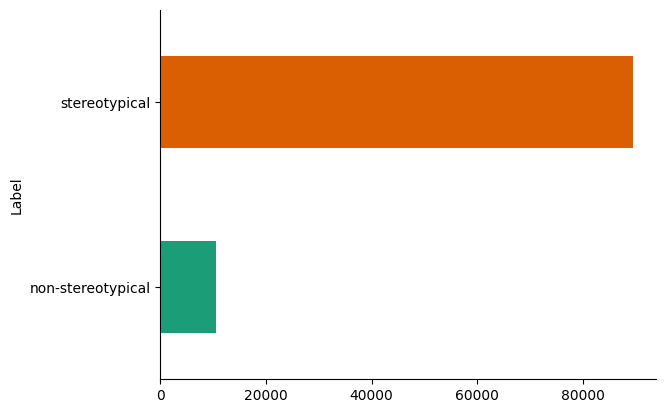

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
merged_data.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


In [13]:
tokenized_texts

,Coref Plot
0,"[101, 22874, 1998, 9932, 2989, 7842, 5737, 188..."
1,"[101, 22874, 1998, 9932, 2989, 7842, 5737, 188..."
2,"[101, 22874, 1998, 9932, 2989, 7842, 5737, 188..."
3,"[101, 7842, 5737, 18886, 4282, 2008, 2019, 401..."
4,"[101, 7842, 5737, 18886, 4282, 2008, 2019, 401..."
...,...
100063,"[101, 28605, 2003, 10909, 11265, 3270, 12134, ..."
100064,"[101, 28605, 2003, 10909, 11265, 3270, 12134, ..."
100065,"[101, 2540, 29162, 2540, 29162, 9979, 1998, 51..."
100066,"[101, 2540, 29162, 2540, 29162, 9979, 1998, 51..."


In [14]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
from transformers import pipeline

In [16]:
ner_pipe = pipeline("ner", model="dslim/bert-base-NER", tokenizer="dslim/bert-base-NER")

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [17]:
text_list = df1['Coref Plot'][10:20].tolist()


In [18]:
ner_results = ner_pipe(text_list)

In [19]:
for i, result in enumerate(ner_results):
    print(f"Text {i+1}:")
    for entity in result:
        print(f"Entity: {entity['word']}, Label: {entity['entity']}")
    print()

Text 1:
Entity: An, Label: B-PER
Entity: ##jana, Label: B-PER
Entity: She, Label: B-PER
Entity: ##kar, Label: B-PER
Entity: An, Label: B-PER
Entity: ##jana, Label: B-PER
Entity: An, Label: B-PER
Entity: ##jana, Label: B-PER
Entity: She, Label: B-PER
Entity: ##kar, Label: I-PER

Text 2:

Text 3:
Entity: She, Label: B-PER
Entity: ##kar, Label: I-PER
Entity: She, Label: B-PER
Entity: ##kar, Label: B-PER
Entity: She, Label: B-PER
Entity: ##kar, Label: I-PER
Entity: An, Label: B-PER
Entity: ##jana, Label: B-PER
Entity: She, Label: B-PER
Entity: ##kar, Label: I-PER

Text 4:

Text 5:
Entity: Bach, Label: B-PER
Entity: ##pan, Label: I-PER
Entity: Ram, Label: B-PER
Entity: Ra, Label: I-PER
Entity: ##him, Label: I-PER
Entity: Tom, Label: B-PER

Text 6:
Entity: Ram, Label: B-PER
Entity: Tom, Label: B-PER
Entity: Ra, Label: B-PER
Entity: ##him, Label: B-PER
Entity: Tom, Label: B-PER
Entity: Tom, Label: B-PER
Entity: Tom, Label: B-PER
Entity: Ka, Label: B-PER
Entity: ##shi, Label: B-PER
Entity: La,

In [20]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [21]:
tokenizer1 = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [22]:
model1 = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')


pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [23]:
def sentiment_score(plot):
  tokens = tokenizer1.encode(plot, return_tensors='pt')
  result = model1(tokens)
  return int(torch.argmax(result.logits))+1


In [24]:
sentiment_score(df1['Coref Plot'].iloc[1])


2

In [25]:
df1['Sentiment'] = df1['Coref Plot'][0:50].apply(lambda x: sentiment_score(x[:512]))


In [26]:
df1[0:50]


,Movie Name,Coref Plot,Sentiment
0,Aan Milo Sajna,Widowed and ailing Savitri Choudhury lives a ...,3.0
1,Aan Milo Sajna,Savitri knows that Anil is only waiting for S...,2.0
2,Aan Milo Sajna,The Diwan convinces Anil to mend Anil ways g...,4.0
3,Aan Milo Sajna,Shortly thereafter Anil does appear to have m...,3.0
4,Aan Milo Sajna,Deepali moves in the mansion looks after Sav...,4.0
5,Aan Milo Sajna,What Savitri does not know is that Anil has h...,3.0
6,Abhinetri,A chance meeting between an Assistant Scienti...,4.0
7,Abhinetri,While Shekar has a mother who lives separatel...,3.0
8,Abhinetri,Shekar 's mom approves of Anjana and both ge...,4.0
9,Abhinetri,Anjana stops Anjana involvement in dancing an...,2.0


In [27]:

trailer_data = pd.read_csv('complete-data.csv')


In [28]:
tokenized_texts = trailer_data['emotion'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True))
max_len = max(map(len, tokenized_texts))
padded_texts = torch.tensor([text + [0]*(max_len-len(text)) for text in tokenized_texts])
attention_masks = torch.tensor([[1]*len(text) + [0]*(max_len-len(text)) for text in tokenized_texts])


In [29]:
with torch.no_grad():
    logits = model(input_ids=padded_texts, attention_mask=attention_masks)[0]


In [30]:
predictions = torch.argmax(logits, axis=1).numpy()


In [31]:
trailer_data['Predicted_Sentiment'] = predictions


In [32]:
trailer_data[10:30]


,frame_number,gender,emotion,year,movie_name,Predicted_Sentiment
10,88,man,sad,2014,dedh_ishqiya,1
11,20,man,sad,2014,dedh_ishqiya,1
12,19,man,sad,2014,dedh_ishqiya,1
13,120,man,angry,2014,dedh_ishqiya,1
14,45,man,neutral,2014,dedh_ishqiya,1
15,35,woman,sad,2014,dedh_ishqiya,1
16,36,man,happy,2014,dedh_ishqiya,1
17,59,woman,sad,2014,dedh_ishqiya,1
18,42,man,angry,2014,dedh_ishqiya,1
19,138,woman,happy,2014,dedh_ishqiya,1


In [33]:
trailer_data.to_csv('trailer_sentiment_predictions.csv', index=False)


In [34]:
small_data = df1['Coref Plot'][10:30].tolist()


In [35]:
from transformers import pipeline

nlp = pipeline("text-classification", model="wu981526092/Sentence-Level-Stereotype-Detector", tokenizer="wu981526092/Sentence-Level-Stereotype-Detector")
result = nlp(small_data)



config.json:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [36]:
print(result)

[{'label': 'stereotype_gender', 'score': 0.522083580493927}, {'label': 'anti-stereotype_gender', 'score': 0.781383752822876}, {'label': 'stereotype_gender', 'score': 0.5324431657791138}, {'label': 'unrelated', 'score': 0.4189351797103882}, {'label': 'unrelated', 'score': 0.6409052610397339}, {'label': 'stereotype_gender', 'score': 0.42294254899024963}, {'label': 'unrelated', 'score': 0.5212775468826294}, {'label': 'stereotype_race', 'score': 0.670172929763794}, {'label': 'anti-stereotype_gender', 'score': 0.6074248552322388}, {'label': 'stereotype_gender', 'score': 0.5545667409896851}, {'label': 'unrelated', 'score': 0.9727652668952942}, {'label': 'stereotype_gender', 'score': 0.43792420625686646}, {'label': 'unrelated', 'score': 0.509454607963562}, {'label': 'stereotype_gender', 'score': 0.5416335463523865}, {'label': 'stereotype_gender', 'score': 0.5257264971733093}, {'label': 'stereotype_race', 'score': 0.49721214175224304}, {'label': 'anti-stereotype_gender', 'score': 0.50400036573

In [37]:
from transformers import pipeline

pipe = pipeline("text-classification", model="lauyon/quantifying-stereotype-bert")


config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [38]:
result = pipe(small_data)


In [39]:
result

[{'label': 'LABEL_0', 'score': 0.4211810827255249},
 {'label': 'LABEL_0', 'score': 0.4114225208759308},
 {'label': 'LABEL_0', 'score': 0.43202275037765503},
 {'label': 'LABEL_0', 'score': 0.4007352590560913},
 {'label': 'LABEL_0', 'score': 0.4263695776462555},
 {'label': 'LABEL_0', 'score': 0.42607581615448},
 {'label': 'LABEL_0', 'score': 0.39020559191703796},
 {'label': 'LABEL_0', 'score': 0.4186950922012329},
 {'label': 'LABEL_0', 'score': 0.4625290036201477},
 {'label': 'LABEL_0', 'score': 0.4538809657096863},
 {'label': 'LABEL_0', 'score': 0.427474707365036},
 {'label': 'LABEL_0', 'score': 0.39153853058815},
 {'label': 'LABEL_0', 'score': 0.42264410853385925},
 {'label': 'LABEL_0', 'score': 0.49832236766815186},
 {'label': 'LABEL_0', 'score': 0.42971670627593994},
 {'label': 'LABEL_0', 'score': 0.4316711127758026},
 {'label': 'LABEL_0', 'score': 0.4119786024093628},
 {'label': 'LABEL_0', 'score': 0.41439491510391235},
 {'label': 'LABEL_0', 'score': 0.5705252289772034},
 {'label': 

In [40]:
import spacy
from transformers import pipeline


In [41]:
nlp1 = spacy.load("en_core_web_sm")


In [42]:
generator = pipeline("text-generation", model="gpt2")


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [43]:

def analyze_movie_plot(plot_text, max_length=100):
  doc = nlp1(plot_text)
  entities = [(ent.text, ent.label_) for ent in doc.ents]
  suggestions = generator(f"""Act as a movie analyst. Your task is to examine movie plots and identify instances of gender stereotypes and bias. Provide your analysis of the given movie script, highlighting any stereotypes present and suggesting ways to mitigate them while preserving narrative integrity. For the given movie script: {plot}""", max_length=max_length, truncation=True)
  return entities, suggestions

In [44]:
plot = str(df1['Coref Plot'][0])


In [45]:
entities, suggestions = analyze_movie_plot(plot)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [46]:
print("Entities:", entities)


Entities: [('Savitri Choudhury', 'PERSON'), ('Savitri', 'PERSON'), ('Anil', 'PERSON'), ('India', 'GPE')]
